# **Projet de Série temporelles: Pollution à Pékin**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
data = pd.read_csv('air_pollution.csv', index_col='date', parse_dates=True)
data

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
date,,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333
...,...,...,...,...,...,...,...,...
2014-12-27,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0.000000,0.0,170.250000
2014-12-28,197.375000,-10.791667,1.583333,1019.958333,10.948750,0.000000,0.0,238.666667
2014-12-29,159.000000,-12.333333,0.750000,1013.750000,8.000000,0.000000,0.0,197.375000


<AxesSubplot:xlabel='date'>

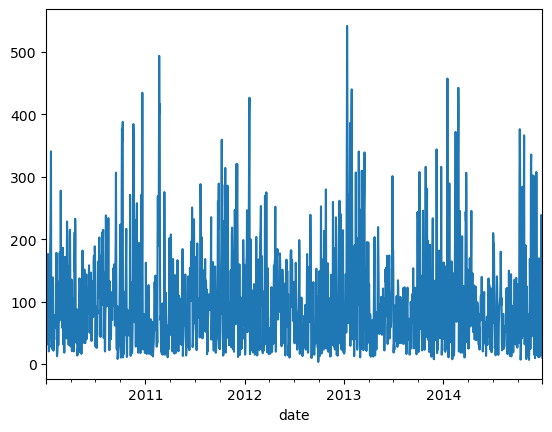

In [35]:
poll = data['pollution_today']
poll.plot()

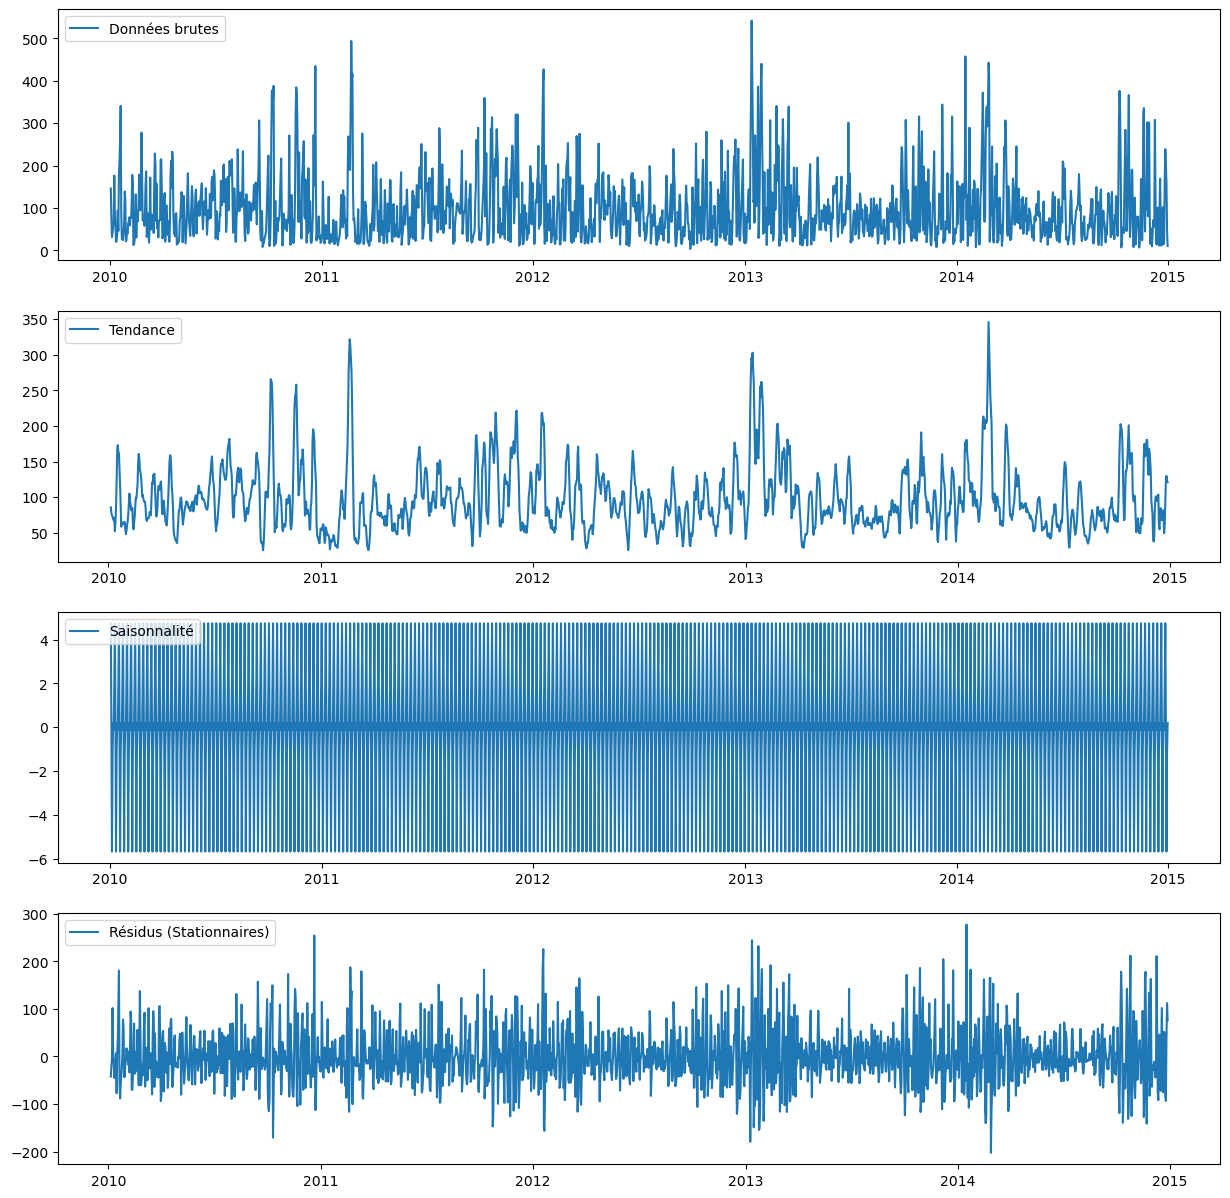

In [37]:
decompose_result = seasonal_decompose(poll, model='additive', period=None)
tendance = decompose_result.trend
saisonnalite = decompose_result.seasonal
residus = decompose_result.resid

plt.figure(figsize=(15, 15))
plt.subplot(411)
plt.plot(poll, label='Données brutes')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(tendance, label='Tendance')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(saisonnalite, label='Saisonnalité')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residus, label='Résidus (Stationnaires)')
plt.legend(loc='upper left')
plt.show()

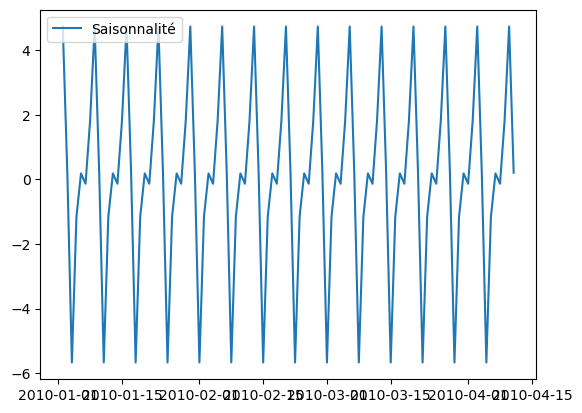

In [40]:
plt.figure()
plt.plot(saisonnalite[0:100], label='Saisonnalité')
plt.legend(loc='upper left')
plt.show()

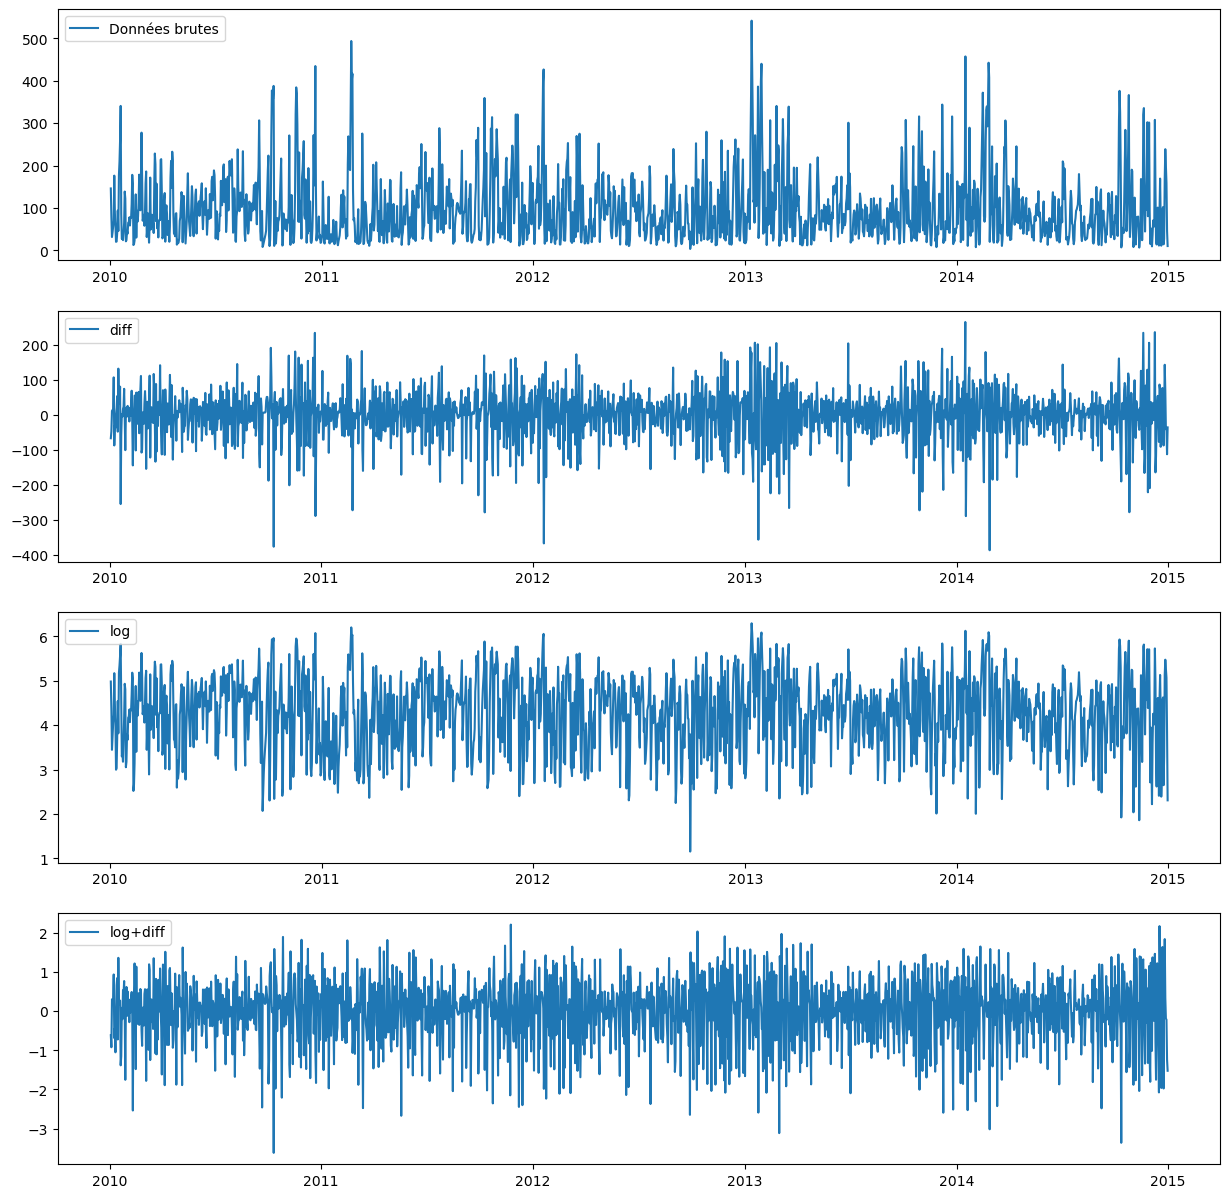

In [36]:
plt.figure(figsize=(15, 15))

plt.subplot(411)
plt.plot(poll, label='Données brutes')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(poll.diff().dropna(), label='diff')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(np.log(poll), label='log')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(np.log(poll).diff().dropna(), label='log+diff')
plt.legend(loc='upper left')
plt.show()